In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/lifu237/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/bordeaux_air_quality.csv', dtype={' pm25':np.float64}, na_values=[' ',''])

In [3]:
data.head(10)

,date,pm25,pm10,o3,no2,so2
0,2024/2/1,48.0,10.0,22.0,8.0,NaN
1,2024/2/2,38.0,13.0,12.0,7.0,NaN
2,2024/2/3,46.0,10.0,11.0,4.0,NaN
3,2024/2/4,36.0,11.0,9.0,6.0,NaN
4,2024/2/5,35.0,12.0,18.0,5.0,NaN
5,2024/2/6,33.0,NaN,NaN,NaN,NaN
6,2024/1/1,31.0,10.0,32.0,5.0,NaN
7,2024/1/2,30.0,20.0,33.0,2.0,NaN
8,2024/1/3,36.0,16.0,24.0,6.0,NaN
9,2024/1/4,39.0,12.0,25.0,7.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3149 non-null   object 
 1    pm25   2037 non-null   float64
 2    pm10   3095 non-null   float64
 3    o3     3128 non-null   float64
 4    no2    3085 non-null   float64
 5    so2    44 non-null     float64
dtypes: float64(5), object(1)
memory usage: 147.7+ KB


In [5]:
data.shape

(3149, 6)

In [6]:
data.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2'], dtype='object')

In [7]:
data=data.rename(columns={' pm25':'pm25', ' pm10':'pm10',
                      ' o3':'o3', ' no2':'no2', ' so2':'so2', 
                      ' co':'co' })

In [8]:
df= data.drop(['so2'], axis=1)

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns[~numeric_columns.isin(['date_column_name'])]

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
# df.fillna(0,inplace=True)
# df.info()

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df1=df[['date', 'pm25', 'pm10', 'o3', 'no2']]

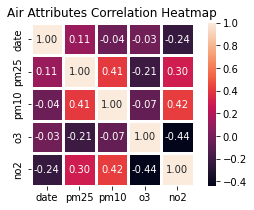

In [12]:
plt.figure(figsize=(5,3))
corr = df1.corr()
sns.heatmap(round(corr, 3), 
            annot=True, 
            fmt='.2f',
            square=True,
            linewidth=3,
            linecolor="white")
plt.title("Air Attributes Correlation Heatmap")
plt.show()

In [13]:
num_columns=corr[corr['pm25']>=0.25].index
num_columns

Index(['pm25', 'pm10', 'no2'], dtype='object')

In [14]:
num_columns1=corr[corr['pm10']>=0.3].index
num_columns1

Index(['pm25', 'pm10', 'no2'], dtype='object')

In [15]:

['date']+list(num_columns)

['date', 'pm25', 'pm10', 'no2']

In [16]:
num_columns1=corr[corr['no2']>=0.3].index
num_columns1

Index(['pm10', 'no2'], dtype='object')

In [17]:
num_columns2=corr[corr['o3']>=0.3].index
num_columns2

Index(['o3'], dtype='object')

In [18]:
df2=df1[['date']+list(num_columns)+list(num_columns2)]
df2

,date,pm25,pm10,no2,o3
0,2024-02-01,48.0,10.0,8.0,22.0
1,2024-02-02,38.0,13.0,7.0,12.0
2,2024-02-03,46.0,10.0,4.0,11.0
3,2024-02-04,36.0,11.0,6.0,9.0
4,2024-02-05,35.0,12.0,5.0,18.0
...,...,...,...,...,...
3144,2014-09-18,32.0,14.0,10.0,31.0
3145,2014-09-19,32.0,14.0,4.0,34.0
3146,2014-09-20,32.0,14.0,2.0,35.0
3147,2014-09-21,32.0,14.0,6.0,33.0


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3149 non-null   datetime64[ns]
 1   pm25    3149 non-null   float64       
 2   pm10    3149 non-null   float64       
 3   no2     3149 non-null   float64       
 4   o3      3149 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 123.1 KB


In [20]:
%pip install pandas plotnine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

In [22]:
# ggplot(df, aes(x = 'pm25', y = 'pm25')) + geom_boxplot()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
df2.describe()

,date,pm25,pm10,no2,o3
count,3149,3149.000000,3149.000000,3149.000000,3149.000000
mean,2019-06-21 14:18:19.777707008,35.360114,15.885678,5.819943,29.246110
min,2014-05-30 00:00:00,5.000000,1.000000,1.000000,1.000000
25%,2016-08-07 00:00:00,28.000000,11.000000,3.000000,23.000000
50%,2019-10-10 00:00:00,32.000000,14.000000,5.000000,29.000000
75%,2021-12-09 00:00:00,37.000000,19.000000,8.000000,36.000000
max,2024-02-06 00:00:00,170.000000,66.000000,26.000000,78.000000
std,NaN,16.445644,7.747132,4.038998,10.308585


In [25]:
features1 = df2[['pm10', 'no2','date','o3']]
target1 = df2['pm25']
features1.head()

,pm10,no2,date,o3
0,10.0,8.0,2024-02-01,22.0
1,13.0,7.0,2024-02-02,12.0
2,10.0,4.0,2024-02-03,11.0
3,11.0,6.0,2024-02-04,9.0
4,12.0,5.0,2024-02-05,18.0


In [26]:
features1['date'] = features1['date'].astype('int64') / 10**9  # Convertir en secondes, ajuster si nécessaire
features1.head()

,pm10,no2,date,o3
0,10.0,8.0,1.706746e+09,22.0
1,13.0,7.0,1.706832e+09,12.0
2,10.0,4.0,1.706918e+09,11.0
3,11.0,6.0,1.707005e+09,9.0
4,12.0,5.0,1.707091e+09,18.0


In [27]:
Normalisation=StandardScaler()

In [28]:
features=Normalisation.fit_transform(features1)
target=target1.values.reshape(-1,1)
target=Normalisation.fit_transform(target)

In [29]:
features,target

(array([[-0.75984411,  0.53983773,  1.59920287, -0.70303158],
        [-0.37254254,  0.29221224,  1.60015173, -1.67325091],
        [-0.75984411, -0.45066424,  1.60110058, -1.77027284],
        ...,
        [-0.24344202, -0.94591523, -1.64682789,  0.55825354],
        [-0.24344202,  0.04458674, -1.64587903,  0.36420967],
        [-0.24344202, -1.19354072, -1.75404843,  0.84931934]]),
 array([[ 0.76870768],
        [ 0.16054737],
        [ 0.64707561],
        ...,
        [-0.20434882],
        [-0.20434882],
        [-0.20434882]]))

### Regression Linéaire

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=132)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

[ 503  609  715  821  928 1034 1140 1246 1352 1458 1564 1670 1776 1882
 1988 2094 2200 2306 2412 2519]


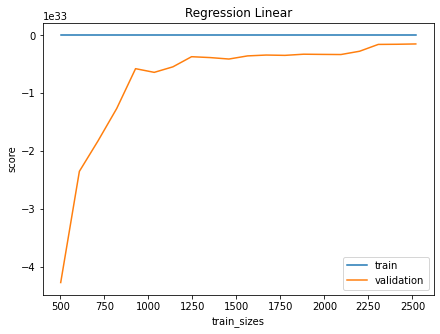

In [32]:
plt.figure(figsize=(7,5))
N,train_score, val_score=learning_curve(model,features,target,train_sizes=np.linspace(0.2,1.0,20),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title('Regression Linear')
plt.legend()

In [33]:
predictions = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [35]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.8482231498505638
R-squared: 0.2306912450322498


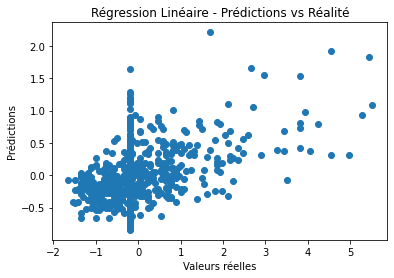

In [36]:
plt.scatter(y_test, predictions)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Linéaire - Prédictions vs Réalité")
plt.show()

### Methode LightGM

In [37]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features1, target1, test_size=0.2, random_state=42)

In [40]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [41]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_round': 10  # Ajoutez cette ligne pour l'arrêt anticipé
}

In [42]:
num_round = 500
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 2519, number of used features: 4
[LightGBM] [Info] Start training from score 35.153632


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[60]	valid_0's l2: 164.729


In [43]:
predictions = bst.predict(X_test, num_iteration=bst.best_iteration)

In [44]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [45]:
print(f'Mean Squared Error: {mse}')
print(f"R-squared: {r2}")

Mean Squared Error: 164.72913529731102
R-squared: 0.44863695944903914


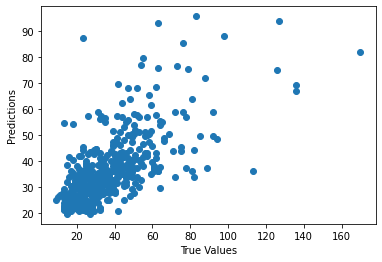

In [46]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()